<a href="https://colab.research.google.com/github/guitar79/OA-2018/blob/master/08_3_Read_fits_mono_16bit_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Read fits file**


* 이 자료는 16 bit mono Fits file을 열어 데이터를 핸들링하는 방법을 설명하는 글이다.

* python이 처음이라면 [Python Basic](https://colab.research.google.com/drive/1PCOoDIKypPVX9KTItMOht1cl96cPmeR_?authuser=1#scrollTo=3g6o04iLM0AF), [Python packages](https://colab.research.google.com/drive/1-1wx2VPEyNe11bmgpSpwdQgrJASCAqdH?authuser=1)를 먼저 학습하기를 권한다.

* package를 쉽게 설치하기 위해 Anaconda 사용을 권장한다.

경기과학고등학교 관측천문학 강좌를 위해 만들었으며  <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">크리에이티브 커먼즈 저작자표시-비영리-동일조건변경허락 4.0 국제 라이선스</a>에 따라 이용할 수 있음.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="크리에이티브 커먼즈 라이선스" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a>

# Download data

MONO CCD로 촬영한 천체사진 [(예제 fits files)](https://drive.google.com/open?id=1guTGchioD5iD8tr1HOu0Qjjj_MjL-c-M) 을 다운받으신 후 파일을 읽고 데이터를 확인해 봅시다.


In [1]:
!pip install astropy
#위 코드는 이곳 notebook에서만 필요합니다. 다른곳에서는 주석 처리하시기 바랍니다.

from astropy.io import fits
import matplotlib.pyplot as plt

#dir_name = '20181012.M42'
f_name = 'm42-003L.fit'

# Processing data

fits file을 파일을 열어 hdu 라는 변수에 저정하고 다음과 같이 출력을 해 보면
> <astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f5d51e59a90>

라는 객체가 생성되어 있음을 확인할 수 있습니다.

In [2]:
# read 16bit monochrome fits file
hdu = fits.open(f_name)
print('hdu :', hdu)

hdu : [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000026E5C7B0C18>]


python에서 dir()은 객체가 가지고 있는 변수, 함수를 보여 준다.

>print(dir(hdu))

In [3]:
print('dir(hdu)\n', dir(hdu))

dir(hdu)
 ['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_data', '_file', '_flush_resize', '_flush_update', '_in_read_next_hdu', '_open_kwargs', '_positive_index_of', '_read_all', '_read_next_hdu', '_readfrom', '_resize', '_save_backup', '_truncate', '_try_while_unread_hdus', '_verify', '_wasresized', 'append', 'clear', 'close', 'copy', 'count', 'extend', 'fileinfo', 'filename', 'flush', 'fromfile', 'fromstring', 'index', 'index_of', 'info', 'insert', 'pop', 'readall', 'remove', 'reverse', 'run_option', 'sort', '

아래의 코드를 참자하여 fits 파일에 있는 정보들을 읽어보자. 

In [4]:
print('hdu.info()\n', hdu.info())
print('hdu[0].header\n', hdu[0].header)
print('hdu[0].data\n', hdu[0].data)

Filename: m42-003L.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   (3326, 2504)   int16 (rescales to uint16)   
hdu.info()
 None
hdu[0].header
 SIMPLE  =                    T                                                  BITPIX  =                   16 /8 unsigned int, 16 & 32 int, -32 & -64 real     NAXIS   =                    2 /number of axes                                  NAXIS1  =                 3326 /fastest changing axis                           NAXIS2  =                 2504 /next to fastest changing axis                   BSCALE  =   1.0000000000000000 /physical = BZERO + BSCALE*array_value           BZERO   =   32768.000000000000 /physical = BZERO + BSCALE*array_value           DATE-OBS= '2018-10-12T16:26:48' /YYYY-MM-DDThh:mm:ss observation start, UT      EXPTIME =   400.00000000000000 /Exposure time in seconds                        EXPOSURE=   400.00000000000000 /Exposure time in seconds                    

hdu[0]의 pixel value를 변수에 저장하여 그 값을 읽어보자.

In [5]:
# save data from fits file
fits_data = hdu[0].data
print('fits_data.shape\n', fits_data.shape)
print('fits_data\n', fits_data)

fits_data.shape
 (2504, 3326)
fits_data
 [[3915 3944 4223 ... 3884 3951 3955]
 [4051 3847 4203 ... 3889 3870 3711]
 [3921 4235 4403 ... 3951 3835 3825]
 ...
 [3854 4031 3839 ... 3358 3499 3290]
 [3843 3973 3839 ... 3544 3345 3341]
 [3935 4057 4028 ... 3423 3360 3415]]


fits_data를 display 해 보고 싶다면 다음과 같이 matplotlib를 이용할 수 있다.

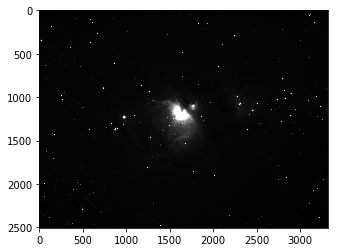

In [6]:
# show fits file 
plt.imshow(fits_data, cmap = 'gray', interpolation = 'None')
plt.show()

In [7]:
# write 16bit monochrome fits file
hdu.writeto(f_name[:-4]+'_changed'+f_name[-4:], overwrite =True)

정리 차원에서 최종 코드를 첨부한다.

* [full code](https://github.com/guitar79/OA-2018/blob/master/08-3.read_mono_fits_16bit_file.py)